### Load Data

In [22]:
airbnb_data <- read.csv("Airbnb_Open_Data.csv", header = T, na.strings = "", fileEncoding="UTF-8") # set "" to NA
airbnb_data

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
“invalid input found on input connection 'Airbnb_Open_Data.csv'”


id,host.id,host_identity_verified,host.name,neighbourhood.group,neighbourhood,lat,long,country,country.code,⋯,Construction.year,price,service.fee,minimum.nights,number.of.reviews,last.review,reviews.per.month,review.rate.number,calculated.host.listings.count,availability.365
<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<int>
1001254,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,⋯,2020,$966,$193,10,9,10/19/2021,0.21,4,6,286
1002102,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,⋯,2007,$142,$28,30,45,5/21/2022,0.38,4,2,228
1002403,78829239556,NA,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,⋯,2005,$620,$124,3,0,NA,NA,5,1,352
1002755,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,⋯,2005,$368,$74,30,270,7/5/2019,4.64,4,1,322
1003689,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,⋯,2009,$204,$41,10,9,11/19/2018,0.10,3,1,289
1004098,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,⋯,2013,$577,$115,3,74,6/22/2019,0.59,3,1,374
1004650,61300605564,NA,Alberta,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,⋯,2015,$71,$14,45,49,10/5/2017,0.40,5,1,224
1005202,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,⋯,2009,"$1,060",$212,45,49,10/5/2017,0.40,5,1,219
1005754,79384379533,verified,Evelyn,Manhattan,Hell's Kitchen,40.76489,-73.98493,United States,US,⋯,2005,"$1,018",$204,2,430,6/24/2019,3.47,3,1,180


### Clean Data

#### Get corresponding response and predictor columns

In [23]:
new_data <- subset(as.data.frame(airbnb_data), 
                   select = c(price, instant_bookable, room.type, Construction.year, 
                              service.fee, minimum.nights, review.rate.number, availability.365))

In [24]:
head(new_data)
dim(new_data)

,price,instant_bookable,room.type,Construction.year,service.fee,minimum.nights,review.rate.number,availability.365
,<chr>,<lgl>,<chr>,<int>,<chr>,<int>,<int>,<int>
1,$966,FALSE,Private room,2020,$193,10,4,286
2,$142,FALSE,Entire home/apt,2007,$28,30,4,228
3,$620,TRUE,Private room,2005,$124,3,5,352
4,$368,TRUE,Entire home/apt,2005,$74,30,4,322
5,$204,FALSE,Entire home/apt,2009,$41,10,3,289
6,$577,TRUE,Entire home/apt,2013,$115,3,3,374


[1] 305   8

#### Remove rows that contains NA

In [25]:
# Remove rows with NA values
clean_data <- na.omit(new_data)

In [26]:
head(clean_data)
dim(clean_data)

,price,instant_bookable,room.type,Construction.year,service.fee,minimum.nights,review.rate.number,availability.365
,<chr>,<lgl>,<chr>,<int>,<chr>,<int>,<int>,<int>
1,$966,FALSE,Private room,2020,$193,10,4,286
2,$142,FALSE,Entire home/apt,2007,$28,30,4,228
3,$620,TRUE,Private room,2005,$124,3,5,352
4,$368,TRUE,Entire home/apt,2005,$74,30,4,322
5,$204,FALSE,Entire home/apt,2009,$41,10,3,289
6,$577,TRUE,Entire home/apt,2013,$115,3,3,374


[1] 125   8

#### Check if there are still any empty entries

In [27]:
has_empty_entries <- sum(is.na(clean_data)) > 0
has_empty_entries

[1] FALSE

#### Remove duplicates

In [28]:
unique(clean_data)

,price,instant_bookable,room.type,Construction.year,service.fee,minimum.nights,review.rate.number,availability.365
,<chr>,<lgl>,<chr>,<int>,<chr>,<int>,<int>,<int>
1,$966,FALSE,Private room,2020,$193,10,4,286
2,$142,FALSE,Entire home/apt,2007,$28,30,4,228
3,$620,TRUE,Private room,2005,$124,3,5,352
4,$368,TRUE,Entire home/apt,2005,$74,30,4,322
5,$204,FALSE,Entire home/apt,2009,$41,10,3,289
6,$577,TRUE,Entire home/apt,2013,$115,3,3,374
7,$71,FALSE,Private room,2015,$14,45,5,224
8,"$1,060",FALSE,Private room,2009,$212,45,5,219
9,"$1,018",TRUE,Private room,2005,$204,2,3,180


In [29]:
install.packages("dplyr")

library(dplyr)

Installing package into ‘/opt/r’
(as ‘lib’ is unspecified)



In [30]:
new_clean_data <- clean_data %>% distinct() # remove duplicate rows and only keep the distinct rows
dim(new_clean_data)

[1] 125   8

#### Get data summary

In [31]:
summary(new_clean_data)

    price           instant_bookable  room.type         Construction.year
 Length:125         Mode :logical    Length:125         Min.   :2003     
 Class :character   FALSE:65         Class :character   1st Qu.:2008     
 Mode  :character   TRUE :60         Mode  :character   Median :2012     
                                                        Mean   :2012     
                                                        3rd Qu.:2017     
                                                        Max.   :2022     
 service.fee        minimum.nights   review.rate.number availability.365
 Length:125         Min.   :-10.00   Min.   :1.000      Min.   : -6.0   
 Class :character   1st Qu.:  2.00   1st Qu.:2.000      1st Qu.: 76.0   
 Mode  :character   Median :  4.00   Median :3.000      Median :219.0   
                    Mean   : 40.94   Mean   :3.184      Mean   :209.2   
                    3rd Qu.: 30.00   3rd Qu.:4.000      3rd Qu.:335.0   
                    Max.   :452.00   Max.   

In [32]:
mode(new_clean_data$Construction.year)
mode(new_clean_data$minimum.nights)

[1] "numeric"

[1] "numeric"

#### Convert random variables to appropriate data types

In [33]:
# need to replace categorical data with indicator functions
# instant_bookable = 0 if FALSE, = 1 if TRUE
new_clean_data$instant_bookable <- ifelse(new_clean_data$instant_bookable=="TRUE", "1", "0")
# room.type = 0 if "Private room", =1 if "Entire home/apt"
new_clean_data$room.type <- ifelse(new_clean_data$room.type == "Entire home/apt", "1", "0")

head(new_clean_data)
new_clean_data

,price,instant_bookable,room.type,Construction.year,service.fee,minimum.nights,review.rate.number,availability.365
,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>
1,$966,0,0,2020,$193,10,4,286
2,$142,0,1,2007,$28,30,4,228
3,$620,1,0,2005,$124,3,5,352
4,$368,1,1,2005,$74,30,4,322
5,$204,0,1,2009,$41,10,3,289
6,$577,1,1,2013,$115,3,3,374


price,instant_bookable,room.type,Construction.year,service.fee,minimum.nights,review.rate.number,availability.365
<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>
$966,0,0,2020,$193,10,4,286
$142,0,1,2007,$28,30,4,228
$620,1,0,2005,$124,3,5,352
$368,1,1,2005,$74,30,4,322
$204,0,1,2009,$41,10,3,289
$577,1,1,2013,$115,3,3,374
$71,0,0,2015,$14,45,5,224
"$1,060",0,0,2009,$212,45,5,219
"$1,018",1,0,2005,$204,2,3,180


In [34]:
columns_to_convert <- c("price", "instant_bookable", "room.type", "Construction.year", "service.fee", 
                        "minimum.nights", "review.rate.number", "availability.365")

for (col_name in columns_to_convert) {
  new_clean_data[, col_name] <- as.numeric(gsub("[^0-9.]", "", new_clean_data[, col_name]))
}

In [35]:
# check summary again after conversion
summary(new_clean_data)

     price        instant_bookable   room.type    Construction.year
 Min.   :  54.0   Min.   :0.00     Min.   :0.00   Min.   :2003     
 1st Qu.: 368.0   1st Qu.:0.00     1st Qu.:0.00   1st Qu.:2008     
 Median : 601.0   Median :0.00     Median :1.00   Median :2012     
 Mean   : 623.5   Mean   :0.48     Mean   :0.52   Mean   :2012     
 3rd Qu.: 944.0   3rd Qu.:1.00     3rd Qu.:1.00   3rd Qu.:2017     
 Max.   :1198.0   Max.   :1.00     Max.   :1.00   Max.   :2022     
  service.fee    minimum.nights  review.rate.number availability.365
 Min.   : 11.0   Min.   :  1.0   Min.   :1.000      Min.   :  0.0   
 1st Qu.: 74.0   1st Qu.:  2.0   1st Qu.:2.000      1st Qu.: 76.0   
 Median :120.0   Median :  4.0   Median :3.000      Median :219.0   
 Mean   :124.7   Mean   : 41.1   Mean   :3.184      Mean   :209.4   
 3rd Qu.:189.0   3rd Qu.: 30.0   3rd Qu.:4.000      3rd Qu.:335.0   
 Max.   :240.0   Max.   :452.0   Max.   :5.000      Max.   :425.0   

### Fit Model

In [36]:
attach(new_clean_data)

The following objects are masked from new_clean_data (pos = 3):

    availability.365, Construction.year, instant_bookable,
    minimum.nights, price, review.rate.number, room.type, service.fee




In [37]:
# basic model assuming parallel planes
model1 <- lm(price ~ instant_bookable + room.type + Construction.year +
   service.fee + minimum.nights + review.rate.number + availability.365)
model1

# second model assuming slopes vary with whether the airbnb is instantly bookable
model2 <- lm(price ~ instant_bookable + instant_bookable*Construction.year + instant_bookable*service.fee 
   + instant_bookable*minimum.nights + instant_bookable*review.rate.number + instant_bookable*availability.365 
   + Construction.year + service.fee + minimum.nights + review.rate.number + availability.365 + room.type)

# third model assuming slopes vary with whether the airbnb is private room or entire home/apt
model3 <- lm(price ~ instant_bookable + room.type + room.type*Construction.year + room.type*service.fee
            + room.type*minimum.nights + room.type*review.rate.number + room.type*availability.365 + Construction.year
            + service.fee + minimum.nights + review.rate.number + availability.365 + room.type)

# fourth model assuming slopes vary with both whether the airbnb is instantly bookable and
# whether it is private room or entire home/apt
model4 <- lm(price ~ instant_bookable + room.type + room.type*Construction.year + room.type*service.fee
            + room.type*minimum.nights + room.type*review.rate.number + room.type*availability.365 + Construction.year
            + service.fee + minimum.nights + review.rate.number + availability.365 + room.type + instant_bookable*Construction.year 
            + instant_bookable*service.fee + instant_bookable*minimum.nights + instant_bookable*review.rate.number 
            + instant_bookable*availability.365)


Call:
lm(formula = price ~ instant_bookable + room.type + Construction.year + 
    service.fee + minimum.nights + review.rate.number + availability.365)

Coefficients:
       (Intercept)    instant_bookable           room.type   Construction.year  
        -3.616e+01          -2.299e-01          -1.518e-01           1.801e-02  
       service.fee      minimum.nights  review.rate.number    availability.365  
         4.999e+00           2.071e-04           6.843e-02          -5.082e-04  


### Check Assumptions

#### Residual Plots

In [38]:
e_hat <- resid(model1)

#### Residuals vs. Each Predictor

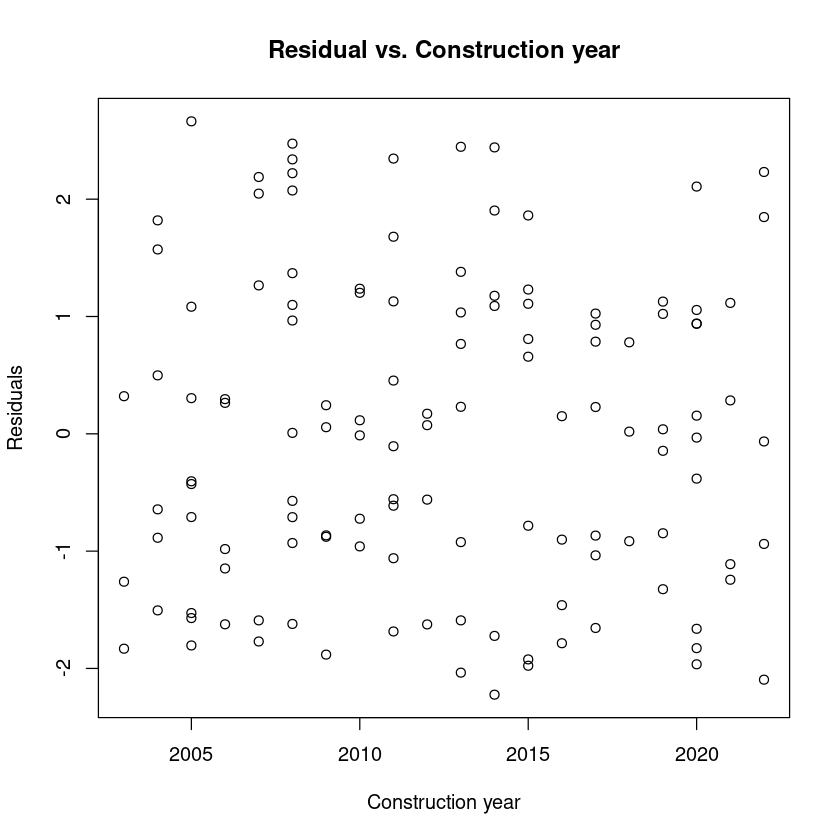

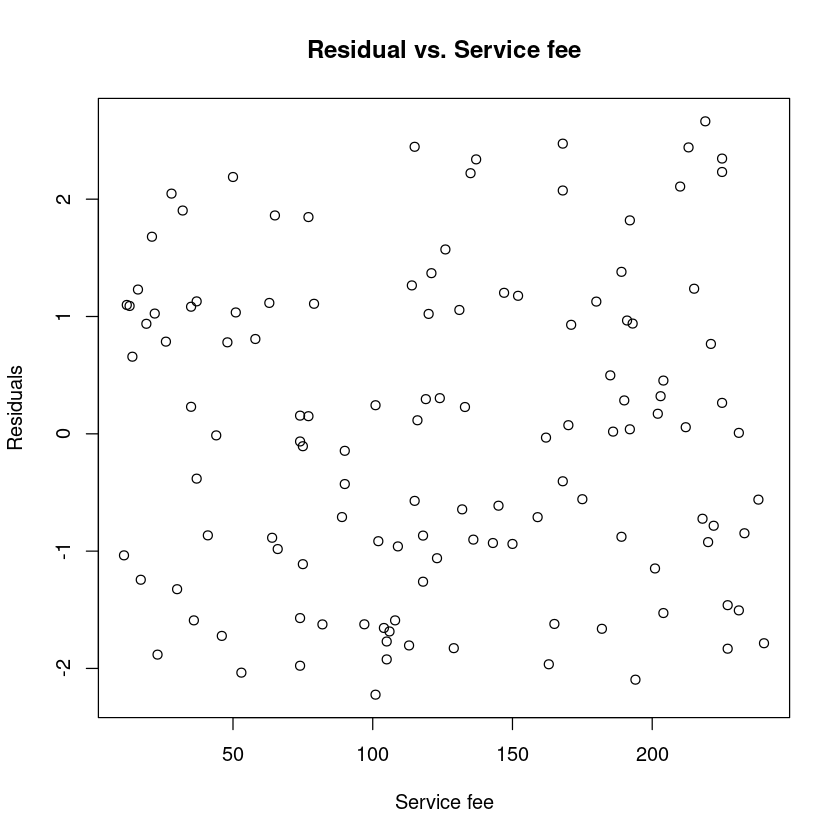

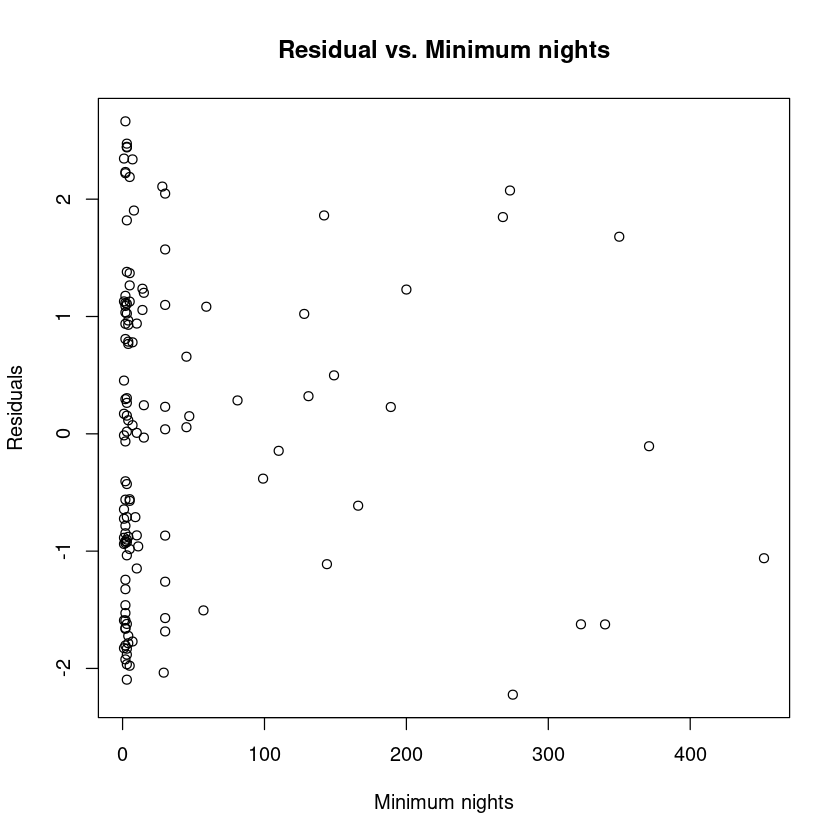

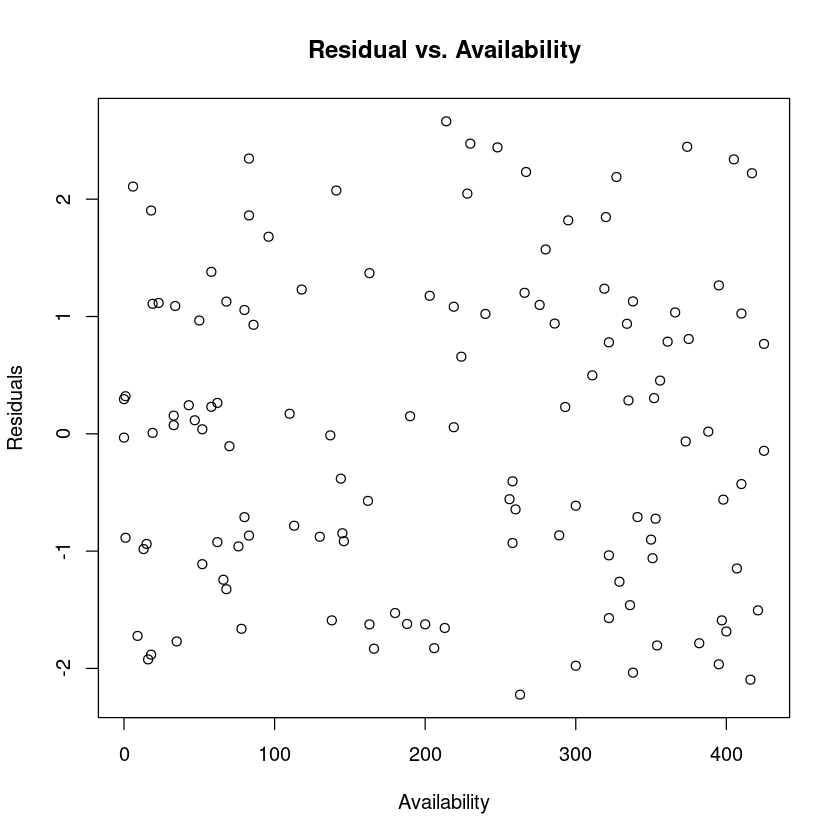

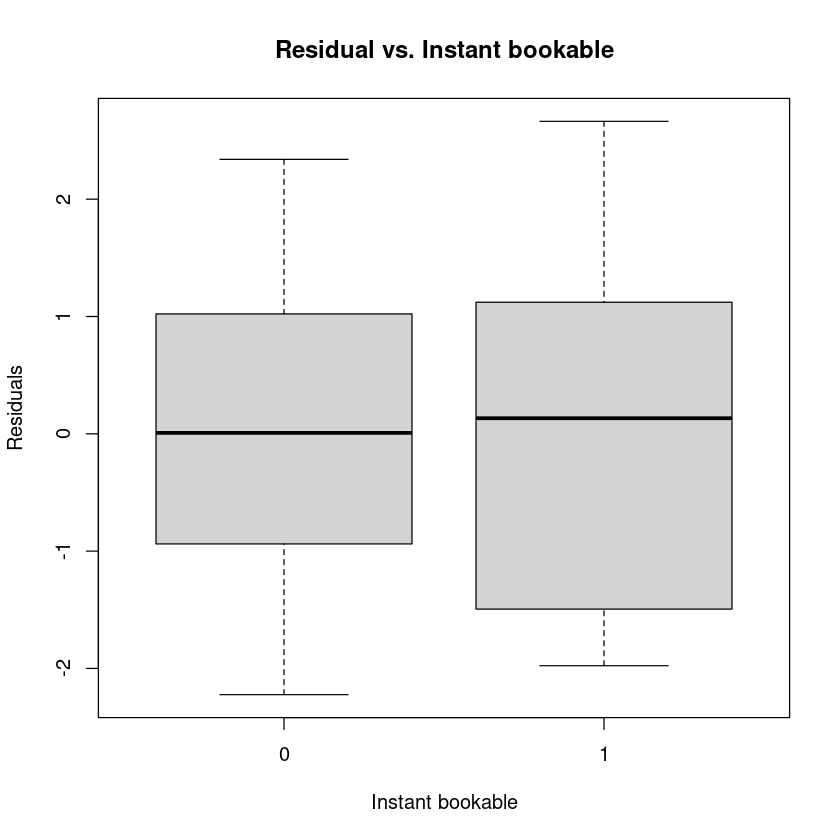

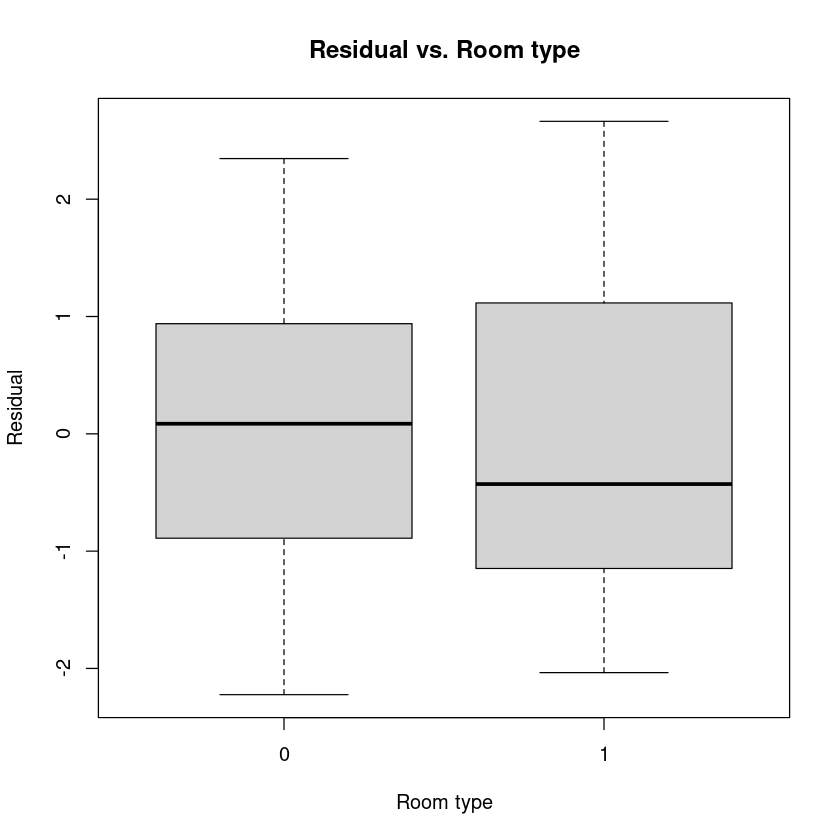

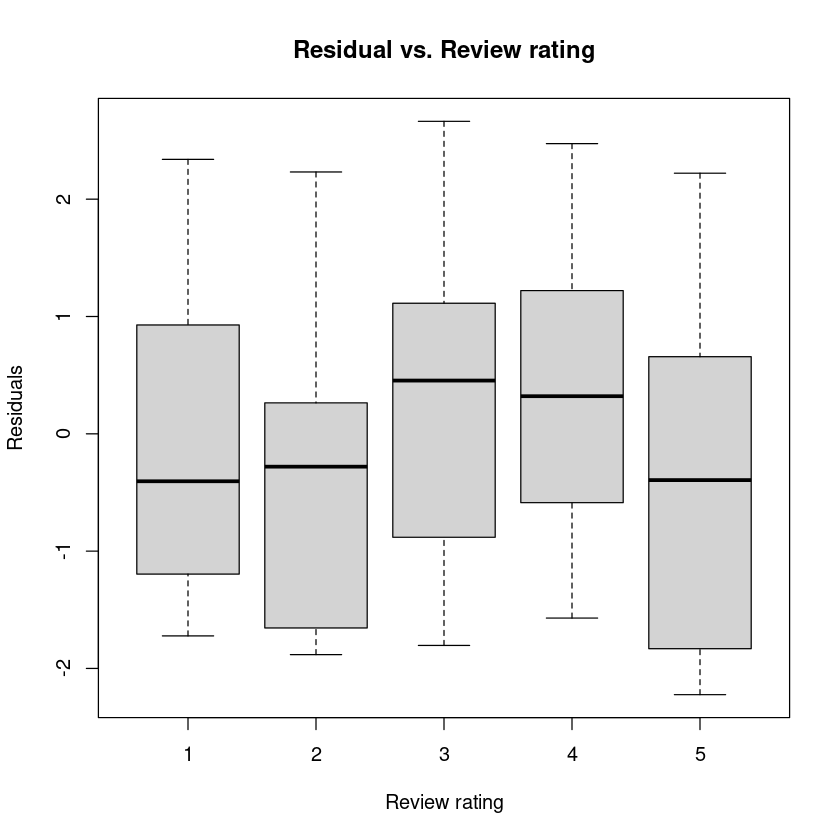

In [39]:
# Scatterplots
# Residual vs. Construction year
plot(x=Construction.year, y=e_hat, main="Residual vs. Construction year", ylab="Residuals", xlab="Construction year")

# Residual vs. Service fee
plot(x=service.fee, y=e_hat, main="Residual vs. Service fee", ylab="Residuals", xlab="Service fee")

# Residual vs. Minimum nights
plot(x=minimum.nights, y=e_hat, main="Residual vs. Minimum nights", ylab="Residuals", xlab="Minimum nights")

# Residual vs. Availability
plot(x=availability.365, y=e_hat, main="Residual vs. Availability", ylab="Residuals", xlab="Availability")

# Boxplots
# Residual vs. Instant bookable
boxplot(e_hat ~ instant_bookable , main="Residual vs. Instant bookable", ylab="Residuals", xlab="Instant bookable")

# Residual vs. Room type
boxplot(e_hat ~ room.type, main="Residual vs. Room type", ylab="Residual", xlab="Room type")

# Residual vs. Review rating
boxplot(e_hat ~ review.rate.number, main="Residual vs. Review rating", ylab="Residuals", xlab="Review rating")

#### Residuals vs. Fitted Values

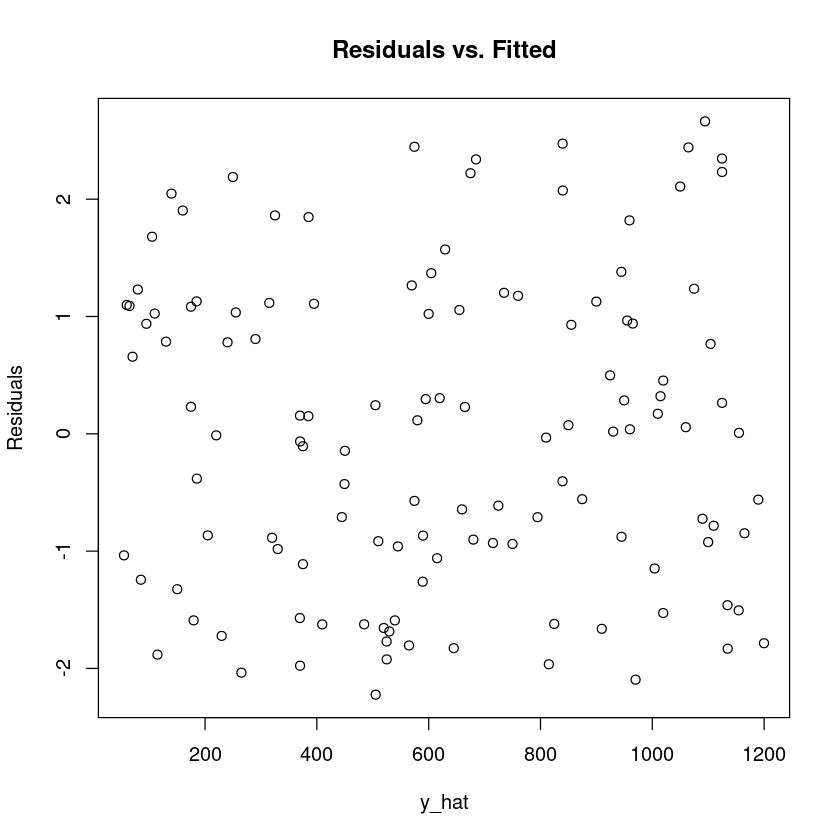

In [40]:
y_hat <- fitted(model1)

plot(x=y_hat, y=e_hat, main="Residuals vs. Fitted", ylab="Residuals", xlab="Fitted")

#### QQ Plot

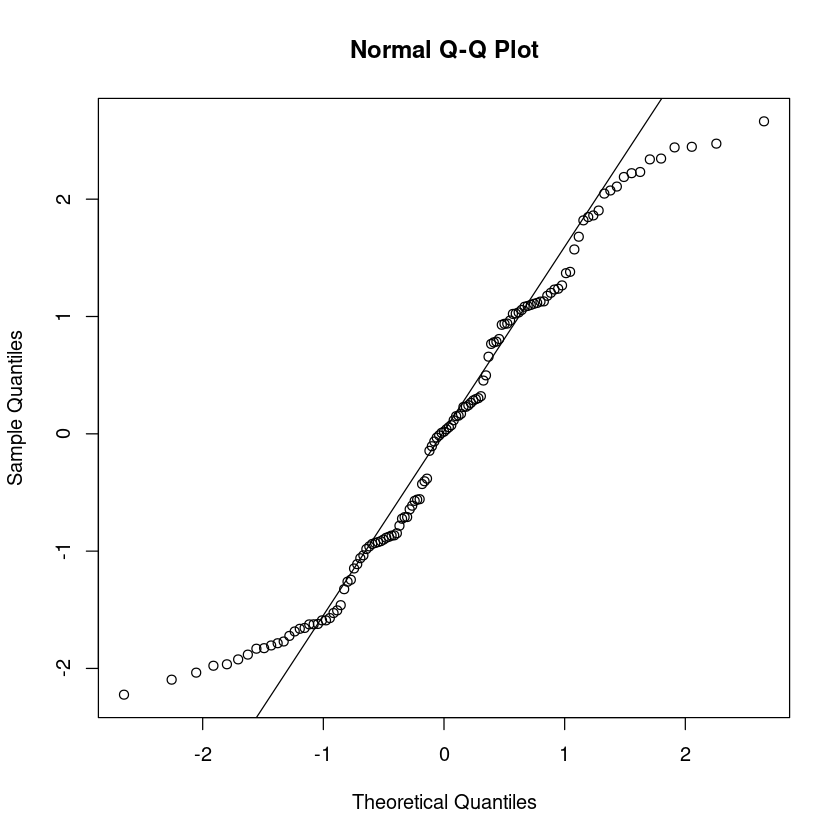

In [41]:
qqnorm(e_hat)
qqline(e_hat)